# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [5]:
# Print the city count to confirm sufficient count
len(cities)

653

In [6]:
#get smaller subet of cities for code testing
cities_test = []
for x in range(25):
    cities_test.append(cities[x])
    
print(cities_test)
    

['buenos aires', 'castro', 'severo-kurilsk', 'port elizabeth', 'ahipara', 'hobart', 'busselton', 'arraial do cabo', 'panguna', 'barrow', 'rikitea', 'vaitupu', 'albany', 'pandamatenga', 'guarapari', 'cabedelo', 'lebu', 'punta arenas', 'kruisfontein', 'vaini', 'port alfred', 'xining', 'nisia floresta', 'iquitos', 'hermanus']


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#generate base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [11]:
#create empty lists for the plot variables
successful_cities = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []


In [12]:
# loop through each city in cities and get the json response (include print log as cities are being processed)
for index, city in enumerate(cities):
    
    try:
        query_url = f"{base_url}{city}"
        response = requests.get(query_url)
        json = response.json()


    #as you loop through, append data to the lists for plot variables
        latitude.append(json["coord"]["lat"])
        temperature.append(json["main"]["temp"])
        humidity.append(json["main"]["humidity"])
        cloudiness.append(json["clouds"]["all"])
        wind_speed.append(json["wind"]["speed"])
        
        #increase the index by 1 so that we do not print a 0'th indexed number
        index += 1
        
        #print log as cities are being processed
        print(f"{index}) {city} processed successfully")
        
        #add city to list of successful cities
        successful_cities.append(city)
        
    
    #print cities that are not in the API database
    except:
        index += 1
        print(f"{index}) {city} not found")
    


1) buenos aires processed successfully
2) castro processed successfully
3) severo-kurilsk processed successfully
4) port elizabeth processed successfully
5) ahipara processed successfully
6) hobart processed successfully
7) busselton processed successfully
8) arraial do cabo processed successfully
9) panguna processed successfully
10) barrow processed successfully
11) rikitea processed successfully
12) vaitupu not found
13) albany processed successfully
14) pandamatenga processed successfully
15) guarapari processed successfully
16) cabedelo processed successfully
17) lebu processed successfully
18) punta arenas processed successfully
19) kruisfontein processed successfully
20) vaini processed successfully
21) port alfred processed successfully
22) xining processed successfully
23) nisia floresta processed successfully
24) iquitos processed successfully
25) hermanus processed successfully
26) korhogo processed successfully
27) cape town processed successfully
28) itigi processed succes

234) praia da vitoria processed successfully
235) bhanpura processed successfully
236) okhotsk processed successfully
237) kazalinsk not found
238) aklavik processed successfully
239) pangnirtung processed successfully
240) yenagoa processed successfully
241) marcona not found
242) klaksvik processed successfully
243) shingu processed successfully
244) fort nelson processed successfully
245) haines junction processed successfully
246) adrar processed successfully
247) broome processed successfully
248) la ronge processed successfully
249) shenkursk processed successfully
250) ola processed successfully
251) lukovetskiy processed successfully
252) yeppoon processed successfully
253) kaabong processed successfully
254) lavrentiya processed successfully
255) sydney processed successfully
256) puerto ayora processed successfully
257) chokwe processed successfully
258) punto fijo processed successfully
259) shahr-e babak processed successfully
260) bambous virieux processed successfully
261

458) ndago processed successfully
459) petropavlovskoye processed successfully
460) hudiksvall processed successfully
461) chokurdakh processed successfully
462) hurghada processed successfully
463) ngunguru processed successfully
464) katsuura processed successfully
465) lompoc processed successfully
466) tomari processed successfully
467) nelson bay processed successfully
468) la macarena processed successfully
469) saint-francois processed successfully
470) oksfjord processed successfully
471) gilgit processed successfully
472) chicama processed successfully
473) cravo norte processed successfully
474) oskarshamn processed successfully
475) ketchikan processed successfully
476) okara processed successfully
477) geresk not found
478) lasa processed successfully
479) svetlyy processed successfully
480) angra not found
481) porto novo processed successfully
482) santiago processed successfully
483) mariental processed successfully
484) geraldton processed successfully
485) brae process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create dataframe out of weather data collected
weather_df = pd.DataFrame({"City": successful_cities, "Latitude": latitude, "Temperature (F)": temperature,
                           "Humidity (%)": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})

weather_df.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,buenos aires,-34.6132,76.41,57,0,14.97
1,castro,-24.7911,66.72,90,100,3.98
2,severo-kurilsk,50.6789,29.21,95,93,21.21
3,port elizabeth,-33.9180,59.00,88,0,4.61
4,ahipara,-35.1667,71.47,67,42,11.45


In [36]:
#export the data into a csv
csv_path = "../output_data/weather.csv"
weather_csv = weather_df.to_csv(csv_path)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_df.loc[weather_df["Humidity (%)"] > 100].index.tolist()
humid_cities


[]

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_weather_df = weather_df.drop(humid_cities).reset_index()

#delete extraneous index column
del clean_weather_df["index"]

#display clean df
clean_weather_df


,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,buenos aires,-34.6132,76.41,57,0,14.97
1,castro,-24.7911,66.72,90,100,3.98
2,severo-kurilsk,50.6789,29.21,95,93,21.21
3,port elizabeth,-33.9180,59.00,88,0,4.61
4,ahipara,-35.1667,71.47,67,42,11.45
...,...,...,...,...,...,...
594,milkovo,54.7167,10.51,91,0,1.57
595,tessalit,20.1986,60.98,27,0,6.93
596,nueva loja,0.0847,71.55,94,64,2.28
597,saint anthony,45.0205,6.62,56,75,2.28


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

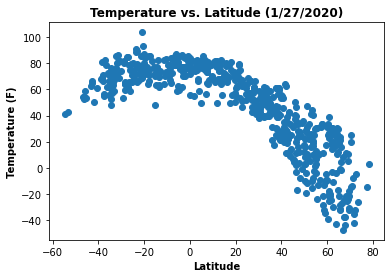

In [19]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Temperature (F)"])
plt.title("Temperature vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Temperature (F)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and temperature on 1/27/2020, with latitude as the independent x variable and temperature in degrees farenheit as the dependent y variable.

## Humidity vs. Latitude Plot

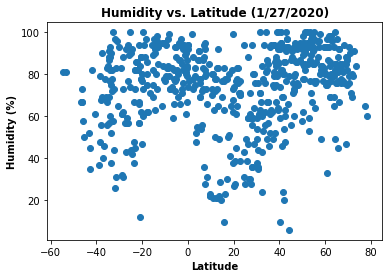

In [20]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Humidity (%)"])
plt.title("Humidity vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Humidity (%)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and humidity % on 1/27/2020, with latitude as the independent x variable and humidity % farenheit as the dependent y variable.

## Cloudiness vs. Latitude Plot

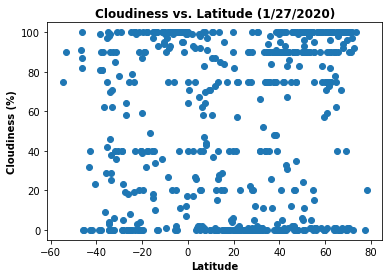

In [21]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Cloudiness (%)"])
plt.title("Cloudiness vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Cloudiness (%)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and cloudiness % on 1/27/2020, with latitude as the independent x variable and cloudiness % as the dependent y variable.

## Wind Speed vs. Latitude Plot

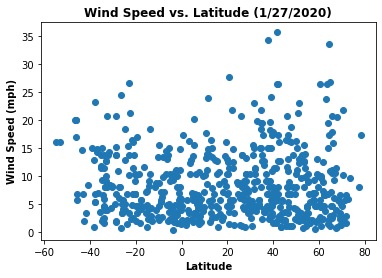

In [22]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Wind Speed (mph)"])
plt.title("Wind Speed vs. Latitude (1/27/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Wind Speed (mph)", fontweight = "bold")

plt.show()

The plot above is analyzing the relationship between a city's latitude and wind speed (mph) on 1/27/2020, with latitude as the independent x variable and wind speed (mph) as the dependent y variable.

## Linear Regression

In [23]:
#insert new column in the df for hemisphere and insert northern or southern based on the latitude value
clean_weather_df["Hemisphere"] = np.where(clean_weather_df["Latitude"] >= 0, "Northern", "Southern")
clean_weather_df

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Hemisphere
0,buenos aires,-34.6132,76.41,57,0,14.97,Southern
1,castro,-24.7911,66.72,90,100,3.98,Southern
2,severo-kurilsk,50.6789,29.21,95,93,21.21,Northern
3,port elizabeth,-33.9180,59.00,88,0,4.61,Southern
4,ahipara,-35.1667,71.47,67,42,11.45,Southern
...,...,...,...,...,...,...,...
594,milkovo,54.7167,10.51,91,0,1.57,Northern
595,tessalit,20.1986,60.98,27,0,6.93,Northern
596,nueva loja,0.0847,71.55,94,64,2.28,Northern
597,saint anthony,45.0205,6.62,56,75,2.28,Northern


In [24]:
northern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Northern"]
southern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Southern"]

In [25]:
#get a list of columns in the dataframe so that we can loop through the columns and create plots
columns = clean_weather_df.columns.tolist()
del columns[0]
del columns[0]
del columns[4]
columns

['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

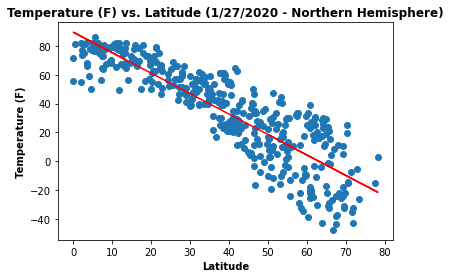

The line equation for the Northern Hemisphere Temperature (F) vs. Latitude relationship is y = -1.42x + 89.63
The r value for the Northern Hemisphere Temperature (F) vs. Latitude relationship is r=-0.87
-----------------------------------------------------------------------------------------------


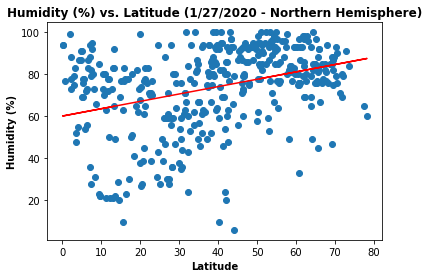

The line equation for the Northern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.35x + 60.15
The r value for the Northern Hemisphere Humidity (%) vs. Latitude relationship is r=0.34
-----------------------------------------------------------------------------------------------


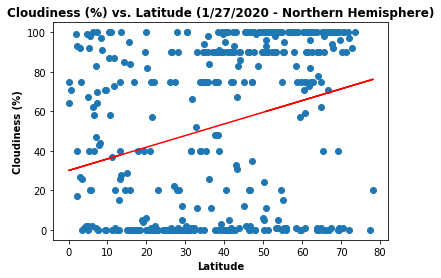

The line equation for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.59x + 30.04
The r value for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.28
-----------------------------------------------------------------------------------------------


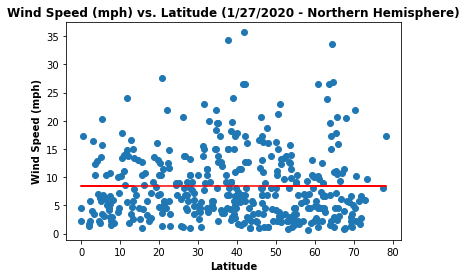

The line equation for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = -0.0x + 8.43
The r value for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=-0.0
-----------------------------------------------------------------------------------------------


In [35]:
#loop through the columns and retrieve regression values for Northern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * northern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Northern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(northern_df["Latitude"], northern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/27/2020 - Northern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(northern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/northern_{column}.png")
    
    #display plots below
    plt.show()
    
    #print line equation and r value under the plot
    print(f"The line equation for the Northern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Northern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")



##### Comments on the northern hempisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is very strong, indicated by the -.87 r value in the regression. As expected, the regression line has negative slope, because we would expect temperature to decrease as distance from the equator in the northern direction increases.
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is weak to moderate, as indicated by the r value of .34. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the northern hemisphere and humidity.
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak as indicated by the r value of .28. Based on this r value one can conclude that there is no discernible relationship between a city's "cloudiness" and its distance from the equator in the northern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is no linear relationship between wind speed and latitude as indicated by the r value of 0. As shown in the plot, the scatter of the points is an indication that wind speed and latitude are not correlated in any manner.

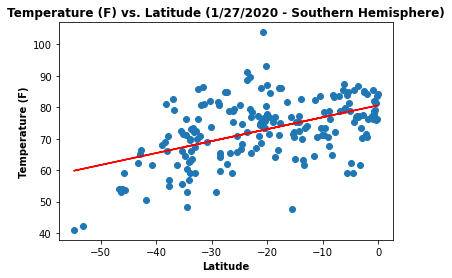

The line equation for the Southern Hemisphere Temperature (F) vs. Latitude relationship is y = 0.38x + 80.64
The r value for the Southern Hemisphere Temperature (F) vs. Latitude relationship is r=0.5
-----------------------------------------------------------------------------------------------


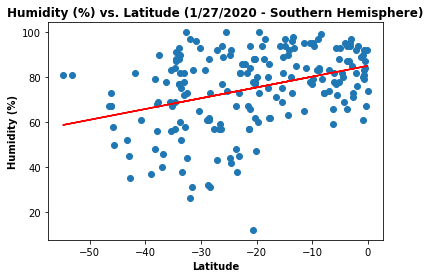

The line equation for the Southern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.48x + 85.04
The r value for the Southern Hemisphere Humidity (%) vs. Latitude relationship is r=0.37
-----------------------------------------------------------------------------------------------


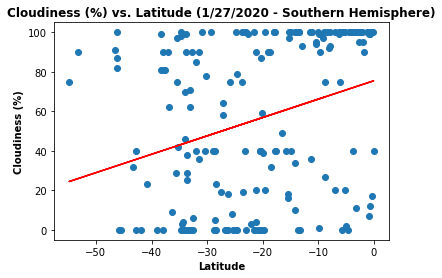

The line equation for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.93x + 75.46
The r value for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.3
-----------------------------------------------------------------------------------------------


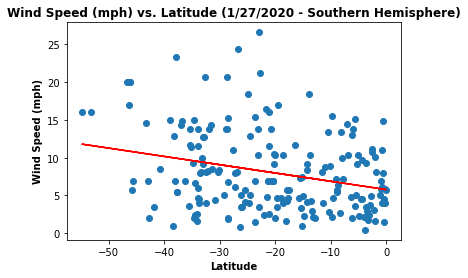

The line equation for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = -0.11x + 5.77
The r value for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=-0.28
-----------------------------------------------------------------------------------------------


In [34]:
#loop through the columns and retrieve regression values for Southern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * southern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Southern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(southern_df["Latitude"], southern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/27/2020 - Southern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(southern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/southern_{column}.png")
    
    #display plots below
    plt.show()
    
   
    
       #print line equation and r value under the plot
    print(f"The line equation for the Southern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Southern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")


#### Comments on the southern hemisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is moderate, indicated by the .5 r value in the regression. As expected, the regression line has positive slope, because we would expect temperature to decrease as distance from the equator decreases (i.e. increases in the negative direction). Note that this relationship is the opposite of the northern hempisphere which is to be expected, as the direction to the equator in each hemisphere is opposite (northern hemisphere positive values, southern hemisphere negative values).
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is moderate, as indicated by the r value of .37. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the southern hemisphere and humidity. As the northern and southern r values are similar and both positive, one can conclude that the equator does have a discernible impact on amount of humidity (%).
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak to moderate as indicated by the r value of .3. Based on this r value one can conclude that there is a weak or no discernible relationship between a city's "cloudiness" and its distance from the equator in the southern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is a weak linear relationship between wind speed and latitude as indicated by the r value of -.28. Although a weak relationship, the r value could indicate that as a city gets further away from the equator in the southern hemisphere, the windier that city will be.